<a href="https://colab.research.google.com/github/Alkafaweey/Bikeshare-Analysis-Project/blob/main/Bikeshare_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

Reading the Data

In [ ]:
data=pd.read_csv('202101_divvy_tripdata.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
ride_id               96834 non-null object
rideable_type         96834 non-null object
started_at            96834 non-null object
ended_at              96834 non-null object
start_station_name    88209 non-null object
start_station_id      88209 non-null object
end_station_name      86557 non-null object
end_station_id        86557 non-null object
start_lat             96834 non-null float64
start_lng             96834 non-null float64
end_lat               96731 non-null float64
end_lng               96731 non-null float64
member_casual         96834 non-null object
dtypes: float64(4), object(9)
memory usage: 6.3+ MB


In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,1/23/21 16:14,1/23/21 16:24,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,1/27/21 18:43,1/27/21 18:47,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,1/21/21 22:35,1/21/21 22:37,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,1/7/21 13:31,1/7/21 13:42,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,1/23/21 2:24,1/23/21 2:24,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [ ]:
data.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
96829,B1A5336E1412D8BF,classic_bike,1/19/21 19:03,1/19/21 20:10,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96830,57EA5CB7DCD75F90,classic_bike,1/5/21 18:42,1/5/21 19:33,Lake Shore Dr & Monroe St,13300,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.880958,-87.616743,41.984037,-87.652310,member
96831,815B319A078CC984,classic_bike,1/7/21 17:59,1/7/21 19:34,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member
96832,6DB04151565CEE63,classic_bike,1/6/21 19:20,1/6/21 20:41,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,member
96833,8008C9C998083A1A,docked_bike,1/17/21 13:20,1/17/21 14:17,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,41.880958,-87.616743,41.880958,-87.616743,casual


In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,96834.000000,96834.000000,96731.000000,96731.000000
mean,41.900482,-87.646076,41.900594,-87.646288
std,0.047050,0.027148,0.047140,0.027215
min,41.640000,-87.780000,41.640000,-87.810000
25%,41.881320,-87.660285,41.881320,-87.660984
50%,41.896857,-87.643118,41.896910,-87.643525
75%,41.929143,-87.629544,41.929466,-87.629544
max,42.064854,-87.528232,42.070000,-87.510000


Convert the value of Started_at and ended_at to datetime 

In [ ]:
data['started_at']=pd.to_datetime(data['started_at'])
data['ended_at']=pd.to_datetime(data['ended_at'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
ride_id               96834 non-null object
rideable_type         96834 non-null object
started_at            96834 non-null datetime64[ns]
ended_at              96834 non-null datetime64[ns]
start_station_name    88209 non-null object
start_station_id      88209 non-null object
end_station_name      86557 non-null object
end_station_id        86557 non-null object
start_lat             96834 non-null float64
start_lng             96834 non-null float64
end_lat               96731 non-null float64
end_lng               96731 non-null float64
member_casual         96834 non-null object
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 7.0+ MB


In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


Creating two new columns; day_of_week and ride_length

In [ ]:
data['day_of_week']=data['started_at'].dt.dayofweek

In [ ]:
data['ride_length']=data['ended_at']-data['started_at']

In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,5,00:10:00
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,2,00:04:00
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,3,00:02:00
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,3,00:11:00
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,5,00:00:00


Converting day_of_week from integer to string

In [ ]:
data['day_of_week']=data['day_of_week'].replace(0, 'Monday')
data['day_of_week']=data['day_of_week'].replace(1, 'Tuesday')
data['day_of_week']=data['day_of_week'].replace(2, 'Wednesday')
data['day_of_week']=data['day_of_week'].replace(3, 'Thursday')
data['day_of_week']=data['day_of_week'].replace(4, 'Friday')
data['day_of_week']=data['day_of_week'].replace(5, 'Saturday')
data['day_of_week']=data['day_of_week'].replace(6, 'Sunday')

In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,96834.000000,96834.000000,96731.000000,96731.000000,96834
mean,41.900482,-87.646076,41.900594,-87.646288,0 days 00:15:16.131730
std,0.047050,0.027148,0.047140,0.027215,0 days 01:23:56.452481
min,41.640000,-87.780000,41.640000,-87.810000,-1 days +23:58:00
25%,41.881320,-87.660285,41.881320,-87.660984,0 days 00:06:00
50%,41.896857,-87.643118,41.896910,-87.643525,0 days 00:09:00
75%,41.929143,-87.629544,41.929466,-87.629544,0 days 00:16:00
max,42.064854,-87.528232,42.070000,-87.510000,13 days 18:26:00


The data is not yet cleaned, a table in ride_lenght is reading as negative (-).

In [ ]:
data[data['ride_length']<'00:00:00']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length
6592,FC1EFEF4475D7F56,classic_bike,2021-01-09 15:42:00,2021-01-09 15:41:00,Monticello Ave & Irving Park Rd,KA1504000139,NaN,NaN,41.954005,-87.719128,NaN,NaN,member,Saturday,-1 days +23:59:00
35752,B1235D38EB2F8A9E,electric_bike,2021-01-06 18:33:00,2021-01-06 18:31:00,Daley Center Plaza,TA1306000010,NaN,NaN,41.883944,-87.629307,41.88,-87.63,member,Wednesday,-1 days +23:58:00


In [ ]:
data['ride_length']=data['ride_length'].drop((data[data['ride_length']<'00:00:00']).index, axis=0)

In [ ]:
data[data['ride_length']<'00:00:00']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length


In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,96834.000000,96834.000000,96731.000000,96731.000000,96832
mean,41.900482,-87.646076,41.900594,-87.646288,0 days 00:15:16.152511
std,0.047050,0.027148,0.047140,0.027215,0 days 01:23:56.502415
min,41.640000,-87.780000,41.640000,-87.810000,0 days 00:00:00
25%,41.881320,-87.660285,41.881320,-87.660984,0 days 00:06:00
50%,41.896857,-87.643118,41.896910,-87.643525,0 days 00:09:00
75%,41.929143,-87.629544,41.929466,-87.629544,0 days 00:16:00
max,42.064854,-87.528232,42.070000,-87.510000,13 days 18:26:00


In [ ]:
data.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
day_of_week               0
ride_length               2
dtype: int64

In [ ]:
data['ride_length_secs']=data['ride_length'].dt.total_seconds()

In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,ride_length_secs
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,Saturday,00:10:00,600.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,Wednesday,00:04:00,240.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,Thursday,00:02:00,120.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,Thursday,00:11:00,660.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,Saturday,00:00:00,0.0


In [ ]:
data.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
day_of_week               0
ride_length               2
ride_length_secs          2
dtype: int64

In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_secs
count,96834.000000,96834.000000,96731.000000,96731.000000,96832,9.683200e+04
mean,41.900482,-87.646076,41.900594,-87.646288,0 days 00:15:16.152511,9.161525e+02
std,0.047050,0.027148,0.047140,0.027215,0 days 01:23:56.502415,5.036502e+03
min,41.640000,-87.780000,41.640000,-87.810000,0 days 00:00:00,0.000000e+00
25%,41.881320,-87.660285,41.881320,-87.660984,0 days 00:06:00,3.600000e+02
50%,41.896857,-87.643118,41.896910,-87.643525,0 days 00:09:00,5.400000e+02
75%,41.929143,-87.629544,41.929466,-87.629544,0 days 00:16:00,9.600000e+02
max,42.064854,-87.528232,42.070000,-87.510000,13 days 18:26:00,1.189560e+06


In [ ]:
data['end_station_name']=data['end_station_name'].fillna(data['end_station_name'].mode()[0])
data['end_station_id']=data['end_station_id'].fillna(data['end_station_id'].mode()[0])
data['start_station_name']=data['start_station_name'].fillna(data['start_station_name'].mode()[0])
data['start_station_id']=data['start_station_id'].fillna(data['start_station_id'].mode()[0])
data['end_lat']=data['end_lat'].fillna(data['end_lat'].mean())
data['end_lng']=data['end_lng'].fillna(data['end_lng'].mean())


## Filling the missing values, the categorical columns are filled with the mode and numerical columns are filled with the mean of the column

In [ ]:
data.isna().sum

<bound method DataFrame.sum of        ride_id  rideable_type  started_at  ended_at  start_station_name  \
0        False          False       False     False               False   
1        False          False       False     False               False   
2        False          False       False     False               False   
3        False          False       False     False               False   
4        False          False       False     False               False   
...        ...            ...         ...       ...                 ...   
96829    False          False       False     False               False   
96830    False          False       False     False               False   
96831    False          False       False     False               False   
96832    False          False       False     False               False   
96833    False          False       False     False               False   

       start_station_id  end_station_name  end_station_id  start_lat

In [ ]:
data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day_of_week           0
ride_length           2
ride_length_secs      2
dtype: int64

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.isna().sum

<bound method DataFrame.sum of        ride_id  rideable_type  started_at  ended_at  start_station_name  \
0        False          False       False     False               False   
1        False          False       False     False               False   
2        False          False       False     False               False   
3        False          False       False     False               False   
4        False          False       False     False               False   
...        ...            ...         ...       ...                 ...   
96829    False          False       False     False               False   
96830    False          False       False     False               False   
96831    False          False       False     False               False   
96832    False          False       False     False               False   
96833    False          False       False     False               False   

       start_station_id  end_station_name  end_station_id  start_lat

In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_secs
count,96832.000000,96832.000000,96832.000000,96832.000000,96832,9.683200e+04
mean,41.900482,-87.646075,41.900594,-87.646288,0 days 00:15:16.152511,9.161525e+02
std,0.047050,0.027147,0.047115,0.027201,0 days 01:23:56.502415,5.036502e+03
min,41.640000,-87.780000,41.640000,-87.810000,0 days 00:00:00,0.000000e+00
25%,41.881320,-87.660285,41.881320,-87.660984,0 days 00:06:00,3.600000e+02
50%,41.896857,-87.643118,41.896910,-87.643746,0 days 00:09:00,5.400000e+02
75%,41.929143,-87.629544,41.929465,-87.629544,0 days 00:16:00,9.600000e+02
max,42.064854,-87.528232,42.070000,-87.510000,13 days 18:26:00,1.189560e+06


In [ ]:
data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day_of_week           0
ride_length           0
ride_length_secs      0
dtype: int64

In [ ]:
cyclist01=data

In [ ]:
cyclist01.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,ride_length_secs
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900341,-87.696743,41.89,-87.72,member,Saturday,00:10:00,600.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900333,-87.696707,41.90,-87.69,member,Wednesday,00:04:00,240.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900313,-87.696643,41.90,-87.70,member,Thursday,00:02:00,120.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900399,-87.696662,41.92,-87.69,member,Thursday,00:11:00,660.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900326,-87.696697,41.90,-87.70,casual,Saturday,00:00:00,0.0


In [ ]:
cyclist01.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,ride_length_secs
count,96832.000000,96832.000000,96832.000000,96832.000000,96832,9.683200e+04
mean,41.900482,-87.646075,41.900594,-87.646288,0 days 00:15:16.152511,9.161525e+02
std,0.047050,0.027147,0.047115,0.027201,0 days 01:23:56.502415,5.036502e+03
min,41.640000,-87.780000,41.640000,-87.810000,0 days 00:00:00,0.000000e+00
25%,41.881320,-87.660285,41.881320,-87.660984,0 days 00:06:00,3.600000e+02
50%,41.896857,-87.643118,41.896910,-87.643746,0 days 00:09:00,5.400000e+02
75%,41.929143,-87.629544,41.929465,-87.629544,0 days 00:16:00,9.600000e+02
max,42.064854,-87.528232,42.070000,-87.510000,13 days 18:26:00,1.189560e+06


In [ ]:
cyclist01.groupby('rideable_type').ride_length_secs.mean()

rideable_type
classic_bike      895.462487
docked_bike      4187.549858
electric_bike     746.200382
Name: ride_length_secs, dtype: float64

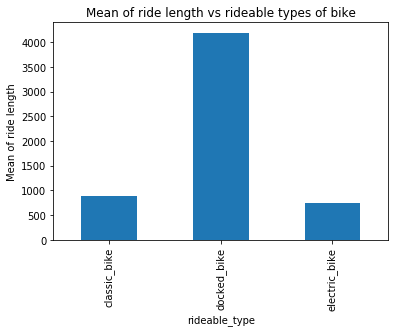

In [ ]:
a=cyclist01.groupby('rideable_type').ride_length_secs.mean()
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('rideable_type')
ax1.set_ylabel('Mean of ride length')
ax1.set_title('Mean of ride length vs rideable types of bike')
a.plot(kind='bar')

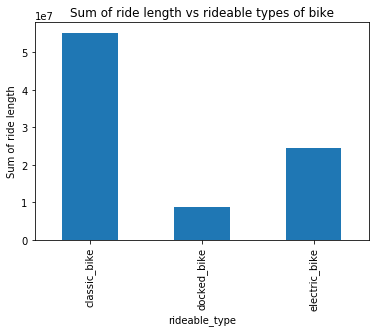

In [ ]:
a=cyclist01.groupby('rideable_type').ride_length_secs.sum()
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('rideable_type')
ax1.set_ylabel('Sum of ride length')
ax1.set_title('Sum of ride length vs rideable types of bike')
a.plot(kind='bar')

In [ ]:
cyclist01.groupby('rideable_type').ride_length_secs.sum()

rideable_type
classic_bike     55249140.0
docked_bike       8818980.0
electric_bike    24644760.0
Name: ride_length_secs, dtype: float64

In [ ]:
cyclist01.groupby('day_of_week').ride_length_secs.sum().sort_values(ascending=False)

day_of_week
Saturday     17649780.0
Friday       13258680.0
Wednesday    12269340.0
Sunday       12131280.0
Thursday     11850240.0
Monday       11399340.0
Tuesday      10154220.0
Name: ride_length_secs, dtype: float64

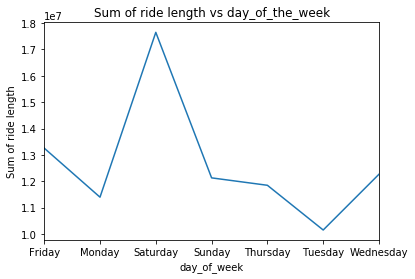

In [ ]:
a=cyclist01.groupby('day_of_week').ride_length_secs.sum()
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('day of the week')
ax1.set_ylabel('Sum of ride length')
ax1.set_title('Sum of ride length vs day_of_the_week')
a.plot(kind='line')

In [ ]:
cyclist01['member_casual'].value_counts()

member    78715
casual    18117
Name: member_casual, dtype: int64

([<matplotlib.patches.Wedge at 0x53c0770>,
 [Text(-0.6099695287128167, -0.9153890834185563, 'member'),
  Text(0.6099695715652713, 0.9153890548638209, 'casual')])

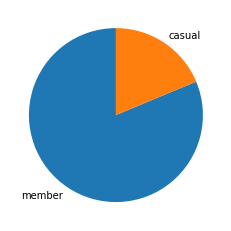

In [ ]:
a=cyclist01['member_casual'].value_counts()
plt.pie(a,labels=a.index,startangle=90)

In [ ]:
(cyclist01.groupby(['day_of_week','member_casual']).ride_length_secs.sum())

day_of_week  member_casual
Friday       casual            3906000.0
             member            9352680.0
Monday       casual            2568660.0
             member            8830680.0
Saturday     casual            7625220.0
             member           10024560.0
Sunday       casual            5020080.0
             member            7111200.0
Thursday     casual            3052680.0
             member            8797560.0
Tuesday      casual            2522760.0
             member            7631460.0
Wednesday    casual            3224400.0
             member            9044940.0
Name: ride_length_secs, dtype: float64

In [ ]:
cyclist01.groupby(['rideable_type']).member_casual.count()

rideable_type
classic_bike     61699
docked_bike       2106
electric_bike    33027
Name: member_casual, dtype: int64

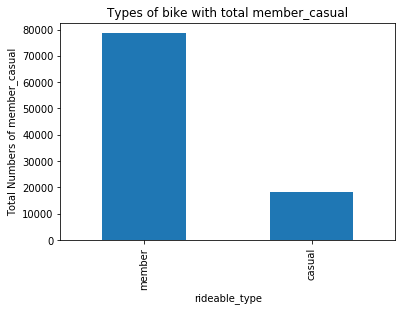

In [ ]:
cyclist01.groupby(['rideable_type']).member_casual.count()
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel('rideable_type')
ax1.set_ylabel('Total Numbers of member_casual')
ax1.set_title('Types of bike with total member_casual')
a.plot(kind='bar')

In [ ]:
pd.pivot_table(cyclist01, index=['member_casual','day_of_week'],values='ride_length_secs',  aggfunc='sum')

ride_length_secs
member_casual day_of_week                  
casual        Friday              3906000.0
              Monday              2568660.0
              Saturday            7625220.0
              Sunday              5020080.0
              Thursday            3052680.0
              Tuesday             2522760.0
              Wednesday           3224400.0
member        Friday              9352680.0
              Monday              8830680.0
              Saturday           10024560.0
              Sunday              7111200.0
              Thursday            8797560.0
              Tuesday             7631460.0
              Wednesday           9044940.0

In [ ]:
casual_weekdays=3907976.0+2567912.0+3050492.0+2523575.0+3223531.0
casual_weekdays

15273486.0

In [ ]:
casual_weekends=7625694.0+5020483.0
casual_weekends

12646177.0

In [ ]:
member_weekdays=9350421.0+8831782.0+8798754.0+7633926.0+9045854
member_weekdays

43660737.0

In [ ]:
memeber_weekends=10022303.0+7111601.0
memeber_weekends

17133904.0

In [ ]:
b={'days_categories':['casual_weekdays','casual_weekends','member_weekdays','member_weekends'],
  'Total_ride_length':[15273486,12646177,43660737,17133904]}
a=pd.DataFrame(b)
a.sort_values(by='Total_ride_length', ascending=False).reset_index() 

,index,days_categories,Total_ride_length
0,2,member_weekdays,43660737
1,3,member_weekends,17133904
2,0,casual_weekdays,15273486
3,1,casual_weekends,12646177


<BarContainer object of 4 artists>

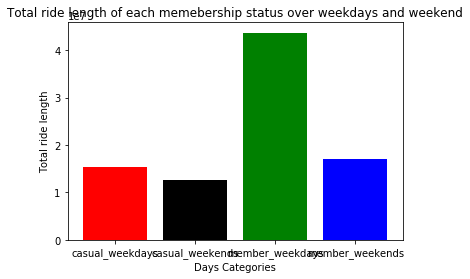

In [ ]:
x=a['days_categories']
y=a['Total_ride_length']
plt.xlabel('Days Categories')
plt.ylabel('Total ride length')
plt.title('Total ride length of each memebership status over weekdays and weekend')
plt.bar(x,y, color=['red', 'black','green','blue'])

In [ ]:
cyclist01.to_csv('January2022.csv')

In [ ]:
cyclist01.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,ride_length_secs
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900341,-87.696743,41.89,-87.72,member,Saturday,00:10:00,600.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900333,-87.696707,41.90,-87.69,member,Wednesday,00:04:00,240.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900313,-87.696643,41.90,-87.70,member,Thursday,00:02:00,120.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900399,-87.696662,41.92,-87.69,member,Thursday,00:11:00,660.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,California Ave & Cortez St,17660,Dearborn St & Erie St,13045,41.900326,-87.696697,41.90,-87.70,casual,Saturday,00:00:00,0.0


In [ ]:
data=pd.read_csv('202102-divvy-tripdata.csv')

In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,day_of_week
count,49622.000000,49622.000000,49408.000000,49408.000000,49622.000000
mean,41.899147,-87.644377,41.899331,-87.644668,4.427794
std,0.044794,0.026006,0.044815,0.026084,1.977426
min,41.650000,-87.774704,41.540000,-87.774704,1.000000
25%,41.880478,-87.658404,41.880958,-87.658663,3.000000
50%,41.895433,-87.641066,41.895634,-87.641066,5.000000
75%,41.925563,-87.629142,41.925602,-87.629318,6.000000
max,42.064854,-87.534814,42.070000,-87.534814,7.000000


In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_lenght,day_of_week
0,89E7AA6C29227EFF,classic_bike,2/12/2021 16:14,2/12/2021 16:21,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0:07:00,6.0
1,0FEFDE2603568365,classic_bike,2/14/2021 17:52,2/14/2021 18:12,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0:20:00,1.0
2,E6159D746B2DBB91,electric_bike,2/9/2021 19:10,2/9/2021 19:19,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0:09:00,3.0
3,B32D3199F1C2E75B,classic_bike,2/2/2021 17:49,2/2/2021 17:54,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0:05:00,3.0
4,83E463F23575F4BF,electric_bike,2/23/2021 15:07,2/23/2021 15:22,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,0:15:00,3.0


In [ ]:
data.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_lenght,day_of_week
49620,C5538FFA492A7B00,classic_bike,2/9/2021 11:44,2/9/2021 11:46,Franklin St & Chicago Ave,13017,Wells St & Walton St,TA1306000011,41.896747,-87.635668,41.89993,-87.63443,member,0:02:00,3.0
49621,EB4CA525B953E123,electric_bike,2/4/2021 10:26,2/4/2021 10:31,Franklin St & Chicago Ave,13017,NaN,NaN,41.896743,-87.635678,41.90000,-87.65000,member,0:05:00,5.0
49622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20197:59:00,NaN
49623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502:10:00,NaN
49624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:24:25,NaN


In [ ]:
data['started_at']=pd.to_datetime(data['started_at'])
data['ended_at']=pd.to_datetime(data['ended_at'])

In [ ]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,day_of_week
count,49622.000000,49622.000000,49408.000000,49408.000000,49622.000000
mean,41.899147,-87.644377,41.899331,-87.644668,4.427794
std,0.044794,0.026006,0.044815,0.026084,1.977426
min,41.650000,-87.774704,41.540000,-87.774704,1.000000
25%,41.880478,-87.658404,41.880958,-87.658663,3.000000
50%,41.895433,-87.641066,41.895634,-87.641066,5.000000
75%,41.925563,-87.629142,41.925602,-87.629318,6.000000
max,42.064854,-87.534814,42.070000,-87.534814,7.000000
